<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-03-06 10:53:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.4'

     0K .......... .......... .......... .......... ..........  0%  173K 3m26s
    50K .......... .......... .......... .......... ..........  0%  103K 4m37s
   100K .......... .......... .......... .......... ..........  0% 60.0M 3m5s
   150K .......... .......... .......... .......... ..........  0% 78.2M 2m18s
   200K .......... .......... .......... .......... ..........  0%  280K 2m16s
   2

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [7]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)



,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [8]:
QUERY = """ select DatabaseWorkedWith, count(DatabaseWorkedWith) as nr from DatabaseWorkedWith group by 1
order by nr desc
"""
pd.read_sql_query(QUERY,conn)

,DatabaseWorkedWith,nr
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016
5,Redis,2508
6,Elasticsearch,1954
7,Oracle,1744
8,MariaDB,1709
9,Firebase,1314


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

JobSat

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

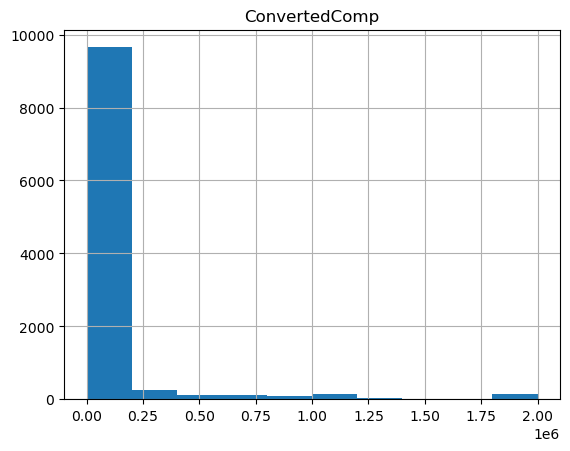

In [8]:
# your code goes here
QUERY = """ SELECT ConvertedComp FROM master """
ConvertedComp = pd.read_sql_query(QUERY,conn)
ConvertedComp.hist()

In [177]:
QUERY = """ SELECT Employment FROM master """
pd.read_sql_query(QUERY,conn)

,Employment
0,Employed full-time
1,Employed full-time
2,Employed full-time
3,Employed full-time
4,Employed full-time
...,...
11393,Employed full-time
11394,Employed full-time
11395,Employed full-time
11396,Employed full-time


### Box Plots


Plot a box plot of `Age.`


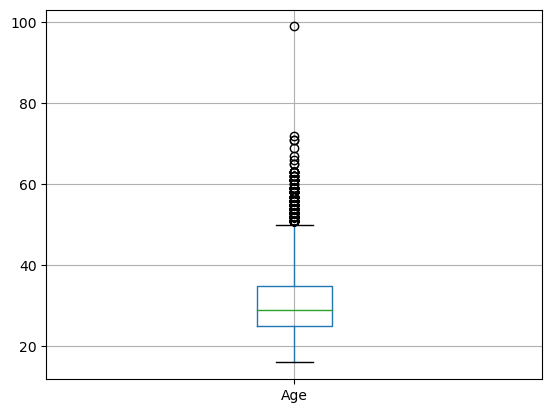

In [9]:
# your code goes here
QUERY = """ SELECT Age FROM master """
Age = pd.read_sql_query(QUERY,conn)
boxplot = Age.boxplot(column=['Age']) 


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

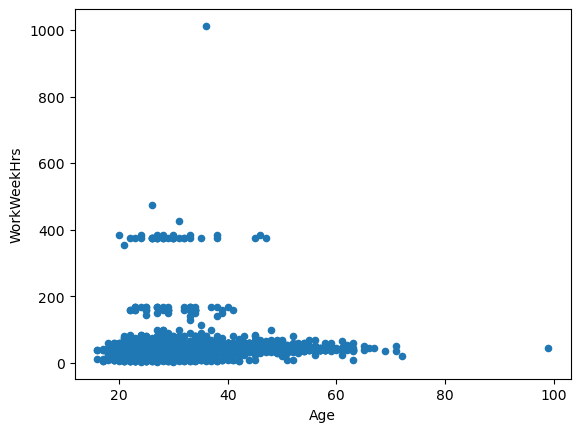

In [10]:
# your code goes here
QUERY = """ SELECT Age,WorkWeekHrs FROM master """
scatter_data = pd.read_sql_query(QUERY,conn)
scatter_data.plot.scatter(x='Age', y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


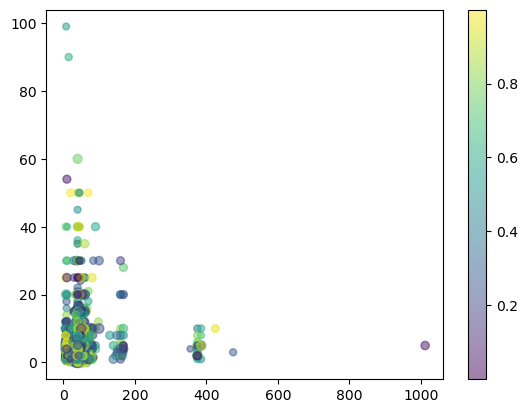

In [11]:
# your code goes here
QUERY = """ SELECT WorkWeekHrs,CodeRevHrs,Age FROM master """
bubble_data = pd.read_sql_query(QUERY,conn)
x = bubble_data.WorkWeekHrs
y = bubble_data.CodeRevHrs
size = bubble_data.Age
colors = np.random.rand(11398)
plt.scatter(x, y, s=size,c=colors,alpha=0.5)
plt.colorbar()
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


               DB_desire  Respondent
0             PostgreSQL    53804386
1                MongoDB    45897489
2                  Redis    41370718
3                  MySQL    41353217
4          Elasticsearch    35314757
5   Microsoft SQL Server    33649369
6                 SQLite    30320901
7               Firebase    20585232
8                MariaDB    17280016
9               DynamoDB    12995539
10             Cassandra    12330710
11                Oracle    10996548
12             Couchbase     4683527


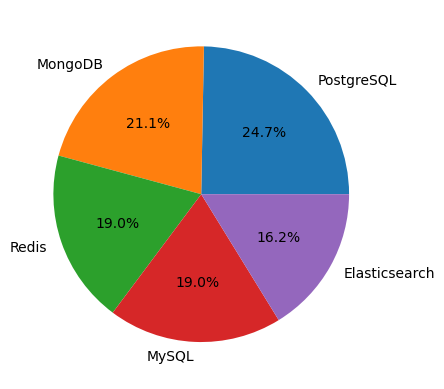

In [113]:
# your code goes here
QUERY = """ SELECT DatabaseDesireNextYear as DB_desire,
Sum(Respondent) as Respondent
FROM DatabaseDesireNextYear
where DatabaseDesireNextYear != 'Other(s):'
Group by DatabaseDesireNextYear
order by Respondent Desc """
pie_data = pd.read_sql_query(QUERY,conn)
print(pie_data)
pie_data = pie_data.head(5)
pie_data = pie_data.reset_index(drop=True).head(5)
label = pie_data.iloc[0:5,0]
value = pie_data.iloc[0:5,1]
plt.pie(value, labels=label,autopct='%1.1f%%')
plt.show()

In [27]:
# your code goes here
QUERY = """ SELECT LanguageDesireNextYear ,
count(LanguageDesireNextYear) as Respondent
FROM LanguageDesireNextYear
Group by LanguageDesireNextYear
order by Respondent desc
""" 
pd.read_sql_query(QUERY,conn)


,LanguageDesireNextYear,Respondent
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


In [41]:
QUERY = """ SELECT LanguageWorkedWith, count(LanguageWorkedWith) as Count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
order by Count desc"""
answer = pd.read_sql_query(QUERY,conn)
answer

,LanguageWorkedWith,Count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [135]:

QUERY = """ SELECT DatabaseWorkedWith ,
count(DatabaseWorkedWith) as count_
FROM DatabaseWorkedWith
where DatabaseWorkedWith = 'MySQL' 
Group by DatabaseWorkedWith
"""
answer = pd.read_sql_query(QUERY,conn)
answer

,DatabaseWorkedWith,count_
0,MySQL,5469


In [136]:
QUERY = """
SELECT * FROM
master 
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5, 1.0, 'stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')

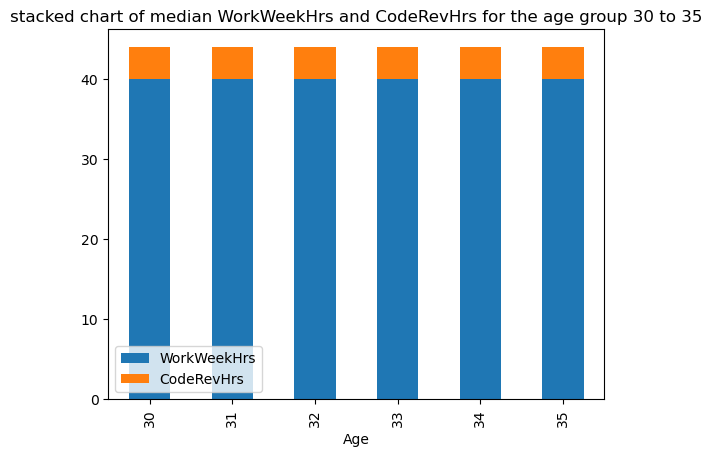

In [50]:
# your code goes here
QUERY = """ SELECT Age,WorkWeekHrs,CodeRevHrs FROM master Where Age between 30 and 35 """
stacked_data = pd.read_sql_query(QUERY,conn)
stacked_data['Age'] = stacked_data['Age'].astype(int)
stacked_data['WorkWeekHrs'] = pd.to_numeric(stacked_data['WorkWeekHrs'], errors='coerce')
stacked_data['CodeRevHrs'] = pd.to_numeric(stacked_data['CodeRevHrs'], errors='coerce')
stacked_data = stacked_data.groupby('Age').median()
stacked_data = stacked_data.dropna()
stacked_data.plot.bar(stacked=True)
plt.title('stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age', ylabel='ConvertedComp'>

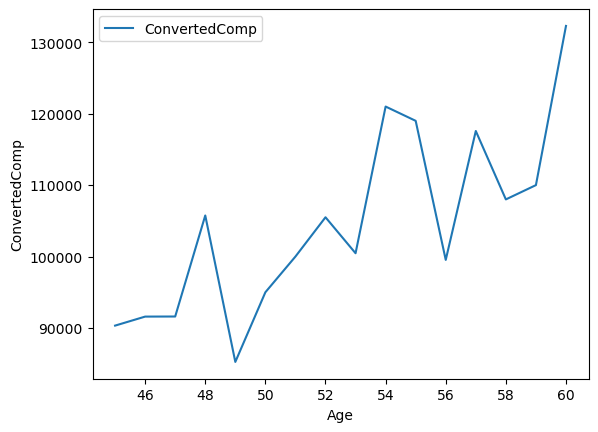

In [79]:
# your code goes here
QUERY = """ SELECT Age,ConvertedComp FROM master Where Age between 45 and 60 """
line_data = pd.read_sql_query(QUERY,conn)
line_data['ConvertedComp'] = pd.to_numeric(line_data['ConvertedComp'], errors='coerce')
line_data['Age'] = line_data['Age'].astype(int)
line_data = line_data.dropna()
line_data = line_data.groupby('Age').median()

line_data.plot(legend=True, xlabel="Age", ylabel="ConvertedComp")

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5, 1.0, 'horizontal bar chart using column MainBranch ')

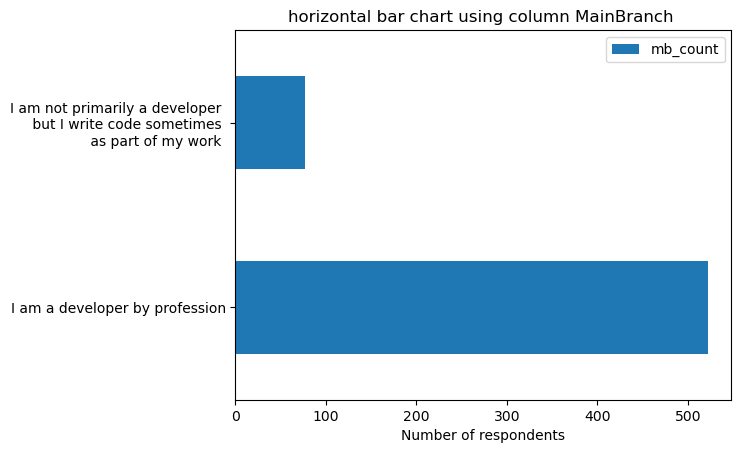

In [105]:
# your code goes here
QUERY = """ SELECT  count(MainBranch) as mb_count ,MainBranch   FROM master Where Age between 45 and 60
group by MainBranch """
Barh_data = pd.read_sql_query(QUERY,conn)
Barh_data.iloc[1,1] = "I am not primarily a developer \n but I write code sometimes \n as part of my work "
ax = Barh_data.plot.barh(x='MainBranch', y='mb_count')
ax.set_xlabel("Number of respondents")
ax.set_ylabel("")
ax.set_title("horizontal bar chart using column MainBranch ")

Close the database connection.


In [106]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
